# Correlation coefficient matrix

Correlation Coefficient Matrix (with target):
            width    height     depth    weight   acidity    target
width    1.000000  0.312141 -0.150515  0.322880  0.307550  0.517267
height   0.312141  1.000000  0.013149  0.174721  0.493988  0.508511
depth   -0.150515  0.013149  1.000000 -0.066463  0.023846 -0.105507
weight   0.322880  0.174721 -0.066463  1.000000  0.206517  0.243196
acidity  0.307550  0.493988  0.023846  0.206517  1.000000  0.778921


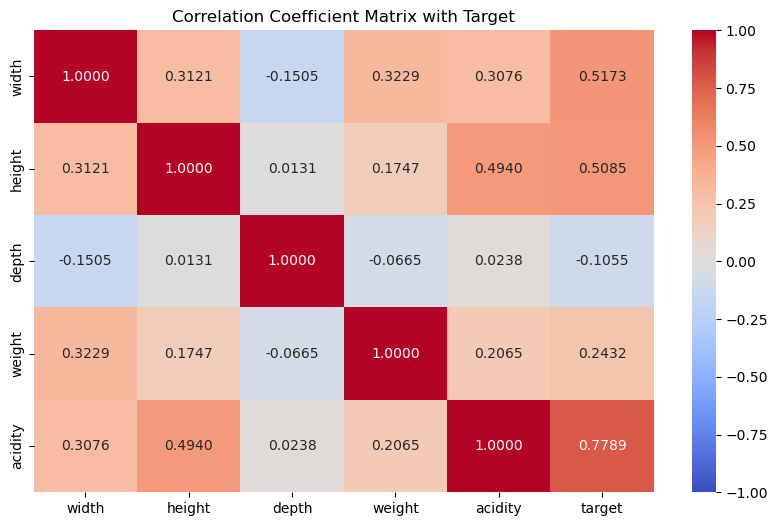

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset from the Excel file
X = pd.read_excel("../coffeeDataSynthesized.xlsx", sheet_name="dataset")

# Create the target variable 'y' based on the "type" column
y = np.where(X["type"] == "robusta", 0, 1)
y = pd.Series(y, name="target")  # Naming the target variable for clarity

# Select the features for correlation calculation
X = X[['width', 'height', 'depth', 'weight','acidity']]

# Calculate the correlation coefficient matrix of the features
corr_matrix = X.corr()

# Calculate the correlation of each feature with the target variable
feature_target_corr = X.apply(lambda col: np.corrcoef(col, y)[0, 1])

# Combine the feature-to-feature correlation matrix with the feature-to-target correlations
corr_matrix_with_target = corr_matrix.copy()
corr_matrix_with_target["target"] = feature_target_corr

# Print the correlation coefficient matrix with target correlations
print("Correlation Coefficient Matrix (with target):")
print(corr_matrix_with_target)

# Plotting the correlation matrix with target
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_with_target, annot=True, cmap='coolwarm', fmt='.4f', vmin=-1, vmax=1)
plt.title('Correlation Coefficient Matrix with Target')
plt.show()


# Feature importance analysis with RandomForest Classifier

Feature Importances:
width: 0.2473
height: 0.1181
depth: 0.0597
weight: 0.0618
acidity: 0.5131


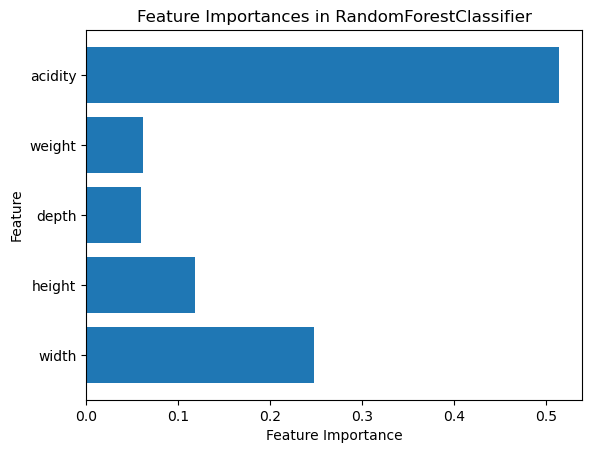

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Read the dataset from the Excel file
X = pd.read_excel("../coffeeDataSynthesized.xlsx", sheet_name="dataset")

# Create the target variable 'y' based on the "type" column
y = np.where(X["type"] == "robusta", 0, 1)
y = pd.Series(y, name="target")  # Naming the target variable for clarity

# Select the features for the model
features = ['width', 'height', 'depth', 'weight','acidity']
X = X[features]

# Initialize and fit a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Print the feature importances
print("Feature Importances:")
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.4f}")


# Visualizing feature importances
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in RandomForestClassifier')
plt.show()
